## Graphlets
#### CS 575 Tutorial
#### Winter 2025
####
#### Mike Goodrich

Sources

- Doroud, M., Bhattacharyya, P., Wu, S. F., & Felmlee, D. (2011, October). The evolution of ego-centric triads: A microscopic approach toward predicting macroscopic network properties. In 2011 IEEE Third International Conference on Privacy, Security, Risk and Trust and 2011 IEEE Third International Conference on Social Computing (pp. 172-179). IEEE.

- Tu, K., Li, J., Towsley, D., Braines, D., & Turner, L. D. (2019, August). gl2vec: Learning feature representation using graphlets for directed networks. In Proceedings of the 2019 IEEE/ACM international conference on advances in social networks analysis and mining (pp. 216-221).

- Copilot response to _"Could you please give me a summary of what graphlets are in a network science context?"_


- [Stanford Graph Machine Learning lecture 2.1](https://www.youtube.com/watch?v=3IS7UhNMQ3U). (Click to follow link.)

- The definitions of _isomorphism_ and _induced subgraph_ are taken from pages 1 and 2 in _Algebraic Graph Theory_ by C. Godsil and G. Royle (Springer 2001).

---

#### Definition of a Graphlet

A graphlet is a "small connected non-isomorphic induced subgraphs of a larger network" [Tu et al 2019]. This definition doesn't include one element from the Stanford lecture: "A graphlet is a **rooted** connected non-isomorphic subgraph" [minute 19:30, emphasis added].  I've found that the union of these two definitions is the most useful. 

**Elements of a group of graphlets:**
  - non-isomorphic graphs
  - connected graphs
  - rooted graphs
  - induced subgraphs

We'll begin with the notion of graph isomorphism.

---

#### Graphlets are Not Isomorphic

Give me three nodes. There are only so many ways that I can connect these three nodes. Graphlets are the set of all "unique" graphs that can be made from these three nodes. You can, of course, generalize to more nodes. The term "unique" is defined in terms of graph isomorphisms.

Some graphs are "essentially the same" as some others. In the language of graph theory, some graphs are _isomorphic_ to each other. I like to think of isomorphism as a way of giving vertices new names in such a way that two renamed vertices are connected if and only if the vertices are connected before they were renamed.  Let's talk about Godsil and Royle's formal definition of a graph isomorphism.

Recall that a graph is a set of vertices, $V$ and a set of edges, $E$. Suppose we have two graphs, $G_1$ and $G_2$. Denote the set vertices of these two graphs by $V(G_1)$ and $V(G_2)$, respectively. Now suppose that we have a mapping $\phi$ between the two vertex sets

$$ \phi : V(G_1) \rightarrow V(G_2) $$

and suppose that this mapping is a _bijection_ (which might easier to remember if we say it is _one-to-one and onto_). Requiring the mapping to be a bijection means that the mapping doesn't create any new vertices, it doesn't remove any vertices, and no two vertices are mapped to the same vertex. 

Let me give an example. Suppose $V(G_1) = \{1,2,3\}$ and $V(G_2) = \{a,b,c\}$. I gave the vertices different types of names in the hopes that this will help us differentiate between vertices in the domain of $\phi$ and vertices in the range. The following table represents a bijection:

| $v \in V(G_1)$ | $\phi(v) \in V(G_2)$ |
| :---: | :---: |
| 1 | b |
| 2 | c | 
| 3 | a |

Notice how each vertex from graph $G_1$ is mapped to a unique vertex in graph $G_2$, and notice how each graph has the same number of vertices. Thus, $\phi$ is a bijection from $V(G_1)$ to $V(G_2)$.

---

We can now state Godsil and Royle's definition of isomorphic graphs. Two graphs $G_1$ and $G_2$ are isomorphic if the following two conditions hold:

- There exists a bijection $\phi: V(G_1) \rightarrow V(G_2)$
- If two vertices $v_1$ and $v_2$ are connected in graph $G_1$ then the vertices in $G_2$ are also connected.

This latter condition can be written as 

$$ \big(v_1,v_2\big) \in E(G_1) \leftrightarrow \big( \phi(v_1),\phi(v_2)\big ) \in E(G_2) $$

In essence, if two nodes are connected before they mapping then they are connected after the mapping. Let's illustrate with an example.

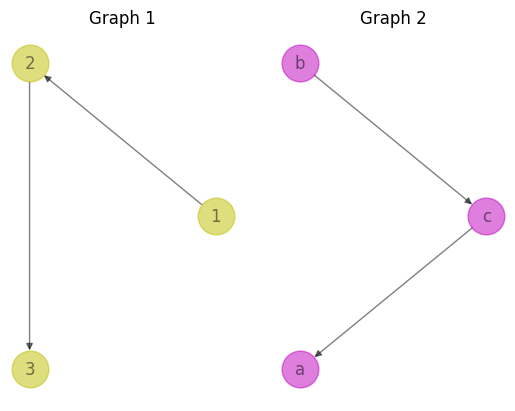

In [1]:
# Using python 3.11.2
# Isomorphism
from matplotlib import pyplot as plt
import networkx as nx

## Define graph G1
nodes_G1 = {1,2,3}
edges_G1 = {(1,2),(2,3)}
G1 = nx.DiGraph()
G1.add_nodes_from(nodes_G1)
G1.add_edges_from(edges_G1)

## Define graph G2
nodes_G2 = {'a','b','c'}
edges_G2 = {('b','c'),('c','a')}
G2 = nx.DiGraph()
G2.add_nodes_from(nodes_G2)
G2.add_edges_from(edges_G2)

## Plot graph G1
pos1 = nx.circular_layout(G1)
plt.figure(1)
plt.subplot(121)
ax = plt.gca()
ax.set_title("Graph 1")
nx.draw(G1,pos1,node_color = 'y', alpha = 0.5, node_size = 700, with_labels = True)

## Plot graph G2
pos2 = nx.circular_layout(G2)
plt.subplot(122)
ax = plt.gca()
ax.set_title("Graph 2")
nx.draw(G2,pos2,node_color = 'm', alpha = 0.5, node_size = 700, with_labels = True)

These two graphs are isomorphic under the following bijective mapping

| $v \in V(G_1)$ | $\phi(v) \in V(G_2)$ |
| :---: | :---: |
| 1 | b |
| 2 | c | 
| 3 | a |

but it's hard to see that in the figure. Let's redraw the second figure.

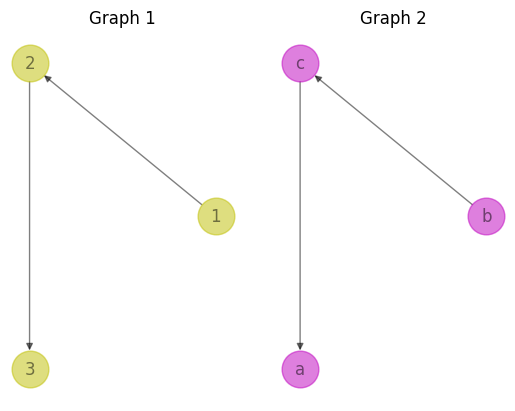

In [2]:
## Plot graph G1
pos1 = nx.circular_layout(G1)
plt.figure(1)
plt.subplot(121)
ax = plt.gca()
ax.set_title("Graph 1")
nx.draw(G1,pos1,node_color = 'y', alpha = 0.5, node_size = 700, with_labels = True)

## Plot graph G2
pos2 = nx.circular_layout(G2)
pos2['a'] = pos1[3]
pos2['c'] = pos1[2]
pos2['b'] = pos1[1]
plt.subplot(122)
ax = plt.gca()
ax.set_title("Graph 2")
nx.draw(G2,pos2,node_color = 'm', alpha = 0.5, node_size = 700, with_labels = True)

Observe the following about what happens to the nodes when they are mapped:
  - node 1 on the left gets mapped to node b on the right
  - node 2 on the left gets mapped to node c on the right
  - node 3 on the left gets mapped to node a on the right

Above, we said that isomorphism requires that if there is an edge between two nodes before the mapping then there still needs to be an edge between the mapped nodes after the mapping. I'm going to use the word "connectedness" to say that there is an edge between two nodes, but be careful to not confuse this with what it means to say that a graph is connected.

Observe the following about the edges of the two graphs:
  - there is a directed edge (1,2) on the left and a directed edge (b,c) on the right, so the mapping 1-->a and 2-->c preserves connectedness
  - there is a directed edge (2,3) on the left and a directed edge (c,a) on the right, so the mapping 2-->c and 3-->a preserves connectedness

The mapping changed the names of the vertices, but vertices connected before the mapping are still connected after the mapping. Since there is a _connection preserving bijection_ between the two graphs, the two graphs are isomorphic.

---

#### Isomorphism is an Equivalence Relation

Isomorphism is an equivalence relation, which means that we can sometimes treat two isomorphic graphs as if they are identical. Recall that if someone gives you an equivalence relation then you can group all equivalent objects into the same set. That set is called an _equivalence class_.

Graphlets are the equivalence classes of the isomorphism relation given graphs that are built from a fixed number of vertices but whose edge set can change. Let's illustrate with a couple of examples.

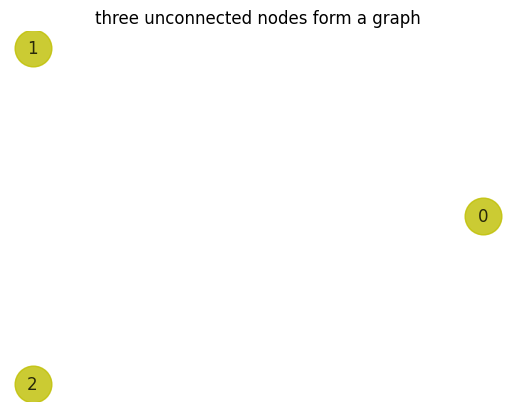

In [3]:
# Isomorphism
from matplotlib import pyplot as plt
import networkx as nx

nodes: set[int] = {0,1,2}
G = nx.DiGraph()
G.add_nodes_from(nodes)
pos = nx.circular_layout(G)
ax = plt.gca()
ax.set_title("three unconnected nodes form a graph")
nx.draw(G,pos,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = True)

We can change the names of the nodes to form a new graph. I'll do this by changing the positions of the nodes.

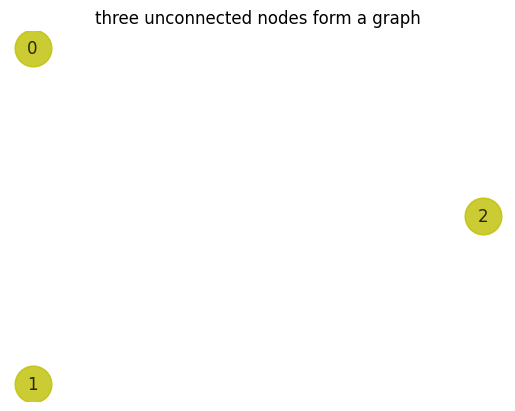

In [4]:
tmp = pos[0]
pos[0] = pos[1]
pos[1] = pos[2]
pos[2] = tmp
colormap = dict([(node,'y') for node in list(G.nodes)])
plt.figure(1)
ax = plt.gca()
ax.set_title("three unconnected nodes form a graph")
nx.draw(G,pos,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = True)

These two graphs are isomorphic since all that changed was the names of the nodes. We can represent the equivalence class of all nodes that are isomorphic to these two graphs by simply dropping the node labels.

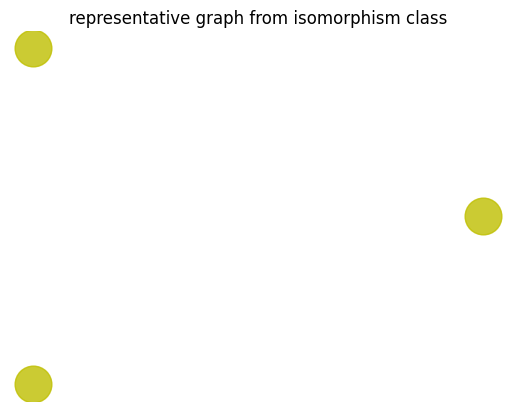

In [5]:
colormap = dict([(node,'y') for node in list(G.nodes)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw(G,pos,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = False)

Let's add a single directed edge and draw a graph from this isomorphism class 

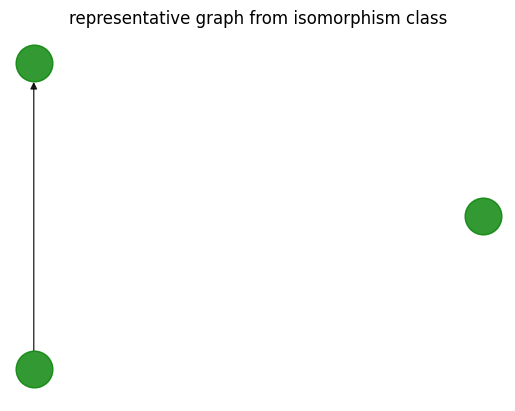

In [6]:
G.add_edge(1,0)
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw(G,pos,node_color = 'g', alpha = 0.8, node_size = 700, with_labels = False)

The graph above represents one of the (isomorphism) equivalence classes for a directed graph with three vertices. Let's add another edge.

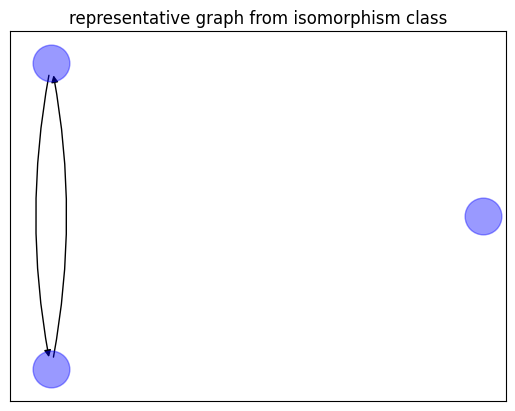

In [7]:
# Add an edge in the opposite direction
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1),(1,0)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw_networkx_nodes(G,pos,node_color = 'b', alpha = 0.4, node_size = 700)
_ = nx.draw_networkx_edges(G,
                       pos,
                       connectionstyle="arc3,rad=0.1"
)

We now have a representative graph from a new equivalence class.

We're constructing all the equivalence classes that appear in Figure 1 from Daroud et al. 2011.

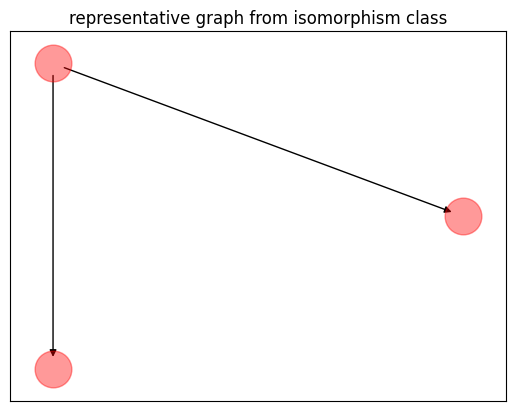

In [8]:
# Create the next equivalence class
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1),(0,2)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw_networkx_nodes(G,pos,node_color = 'r', alpha = 0.4, node_size = 700)
_ = nx.draw_networkx_edges(G,
                       pos,
                       connectionstyle="arc3,rad=0.0")

Add one more

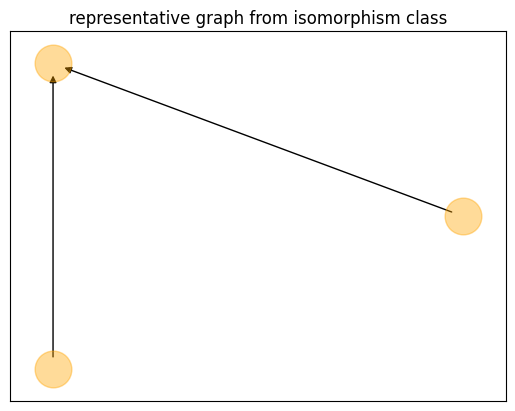

In [9]:
# And one more
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from([(1,0),(2,0)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw_networkx_nodes(G,pos,node_color = 'orange', alpha = 0.4, node_size = 700)
nx.draw_networkx_edges(G, 
                       pos,
                       connectionstyle="arc3,rad=0.0")

Notice how the arrows in this figure point in the opposite direction than the arrows in the previous graph. The two graphs are not isomorphic because swapping two the names of two vertices doesn't preserve the direction of the edges.

---

If we continue building graphs that represent different equivalence classes, we end up with the following figure from Doroud et al. 2011.

<img src = "./figures/isomorphism_classes_3_node_directed_graph.png" alt="set of all isomorphism classes from Figure 3.1 of Doroud et al. 2011"/>

Take a moment to convince yourself that none of these graphs is isomorphic to any of the other graphs. Ignore the numbering at the bottom; that's a special way of identifying the equivalence classes, and we won't use those identifiers.

---

#### Graphlets are Connected

As mentioned above, the definition of a graphlet has evolved from Doroud et al.'s 2011 paper. We identifed four elements required to make up a graphlet:

**Elements of a group of graphlets:**
  - non-isomorphic graphs
  - connected graphs
  - rooted graphs
  - induced subgraphs

  Some of the graphs above are not connected. Let's add that to our definition and see what we produce. For the next part of the tutorial, we'll use undirected graphs.

  The following code generates every possible _connected_ graph that can be created from three vertices. Using the copilot prompt "how do i find the set of all isomorphic graphs with a four nodes in networkx", we get the following code. 

I've modified the code from copilot in four ways: 
- Added type hints
- Changed the index names so they can be either strings or ints
- Restricted attention to connected graphs
- Made it so that it produced the graphlets composed of nodes passed to the function in the `nodes` list

Notice lines 16 and 17. They say that only connected graphs can be graphlets.

In [10]:
import networkx as nx
from itertools import combinations
from typing import  Union

def find_all_unrooted_graphlets(nodes: list[Union[str,int]]) -> list[nx.Graph]:
    all_graphs = []
    # Generate all possible edges
    possible_edges = list(combinations(nodes, 2))

    # Generate all possible graphs
    for i in range(2**len(possible_edges)):
        edges = [possible_edges[j] for j in range(len(possible_edges)) if (i >> j) & 1]
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        if nx.is_connected(G):
            all_graphs.append(G)

    ## Only keep one subgraph from each isomorphism class ##
    unique_graphs = []

    for G in all_graphs:
        if not any(nx.is_isomorphic(G, H) for H in unique_graphs):
            unique_graphs.append(G)
    return unique_graphs

I'm going to want to show sets of graphs a lot, so it's worth writing a helper function.

In [11]:
import numpy as np
from typing import Union
def show_graphs_in_a_set(graphs: list[nx.Graph], 
                         labels: dict[Union[str, int], str] = {},
                         num_cols: int = 4) -> None:
    if num_cols < 1:
        raise ValueError 
    colors: list[str] = ['y', 'lightblue', 'lightgray', 'salmon', 
                         'aquamarine', 'lightpink', 'violet', 'linen']

    num_cols: int = min(num_cols, len(graphs)) # no more columns than graphlets
    num_rows: int = int(np.ceil(len(graphs)/num_cols))
    _, axs = plt.subplots(num_rows, num_cols, 
                          figsize = (2*num_cols, 2*num_rows))
    
    for count in range(num_rows * num_cols):
        ### Choose the right axis format depending on how many graphs there are to plot
        if num_rows == 1 and num_cols == 1:
            axis = plt.gca()
        elif num_rows == 1 and num_cols > 1:
            col = count%num_cols
            axis = axs[col]
        else:
            col = count%num_cols
            row = int(np.floor(count/num_cols))
            axis = axs[row,col]
        
        ### If there are more spots in the grid layout than there are graphs then make some blank
        if count >= len(graphs):
            axis.set_visible(False)
            continue

        ### Choose a circular layout because that makes it easy to see the nodes and edges for small graphs
        pos = nx.circular_layout(graphs[count])
        
        if len(labels) == 0:
            nx.draw(graphs[count], 
                        pos,
                        ax=axis, 
                        node_color=colors[count%len(colors)], 
                        alpha = 0.8, 
                        node_size = 300)
        else:
            sublabels = {node: label for node, label in labels.items() if node in graphs[count].nodes() }
            nx.draw(graphs[count], 
                        pos,
                        ax=axis, 
                        node_color=colors[count%len(colors)], 
                        alpha = 0.8, 
                        node_size = 300,
                        labels = sublabels)
            #sublabels = {node: label for node, label in labels.items() if node in graphs[count].nodes() }
            #nx.draw_networkx_labels(graphs[count], pos, sublabels, font_size=12)
        axis.set_xlim(-1.2, 1.2)
        axis.set_ylim(-1.2, 1.2)
        axis.set_aspect('equal')

Collect all the graphlets for a graph with three vertices

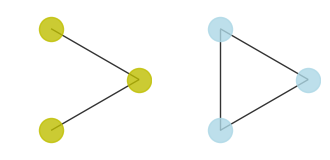

In [12]:
graphlets = find_all_unrooted_graphlets(['A', 'B', 'C'])
show_graphs_in_a_set(graphlets, num_cols=4)

To help build intuition, we can do the same exercise for graphs with two vertices ...

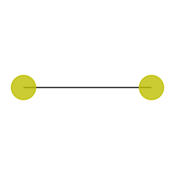

In [13]:
graphlets = find_all_unrooted_graphlets(['A', 'B'])
show_graphs_in_a_set(graphlets, num_cols=4)

... and four vertices.

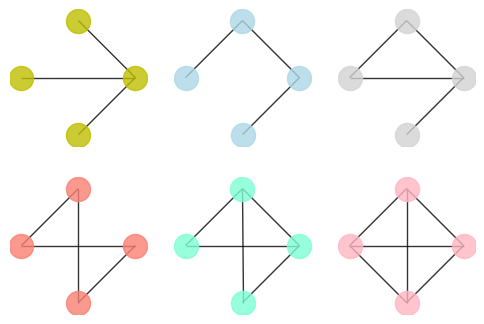

In [35]:
graphlets = find_all_unrooted_graphlets(['A', 'B', 'C', 'D'])
show_graphs_in_a_set(graphlets, num_cols=3)

Notice how none of the graphs above look like the others. Our "pattern-matching brains" naturally differentiate between the different isomorphism classes when graphs are simple to draw.

---

#### Graphlets are Rooted Graphs

Recall the four elements of a group of graphlets:

**Elements of a group of graphlets:**
  - non-isomorphic graphs
  - connected graphs
  - rooted graphs
  - induced subgraphs

  Looking at all the possible three node subgraphs of a particular graph will help us understand what it means for two _rooted graphs_ to be isomorphic. Let's create a simple graph that we can use to guide the discussion. 

(-1.2, 1.2)

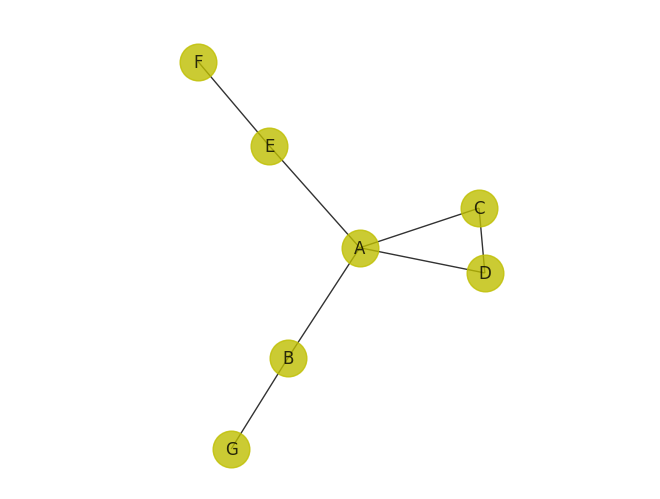

In [15]:
import networkx as nx 
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from({'A','B','C','D','E','F','G'})
G.add_edges_from({('A','B'),('A','C'),('A','D'),('A','E'),('D','C'), ('B','G'), ('F','E')})
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G,pos,node_color='y', alpha = 0.8, node_size = 700, with_labels = True)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

We can write a utility that finds all the connected subgraphs of a particular graph that contain a specific vertex.

In [16]:
import networkx as nx
from itertools import combinations

def find_subgraphs_containing_vertex(G: nx.Graph, 
                              size: int, 
                              vertex: str) -> None:
    graphlets: list[nx.Graph] = []
    for nodes in combinations(G.nodes(), size):
        if vertex not in set(nodes):  # Skip subgraphs that don't contain the target vertes
            continue
        subgraph: nx.Graph = G.subgraph(nodes)
        if nx.is_connected(subgraph):
            graphlets.append(subgraph)
    return graphlets

Find all three-node subgraphs that contain vertex `A`.

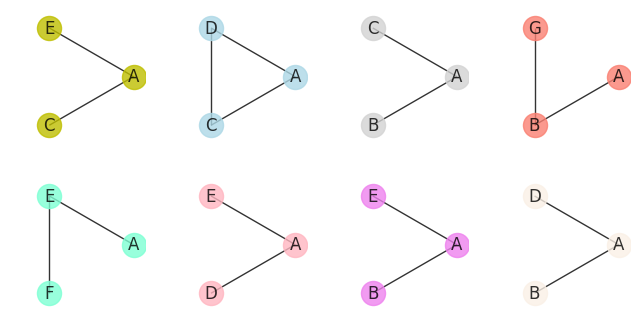

In [17]:
graphs = find_subgraphs_containing_vertex(G, 3, 'A')
labels: dict[str, str] = {vertex: vertex for vertex in G.nodes()}
show_graphs_in_a_set(graphs, labels)

As the use of graphlets has evolved, people have found it useful to differentiate
- not only between the subgraph with three edges and every other subgraph
- but also between different types of the two-edge subgraph.

Note that there are five two-edge subgraphs where node `A` is between the other two nodes, and two two-edge subgraphs where node `A` is on one of the ends. 

The key observation is that the location of vertex `A` in the subgraph matters. If call node `A` the _root_ node, then we need to find a way to say that the two subgraph patterns are not isomorphic if we care about the location of vertex `A`.

Let's look at a solution, and then we'll explain what is going on. 

In [18]:
import networkx as nx
from itertools import combinations
import networkx.algorithms.isomorphism as iso

""" Portions of this code were obtained using prompts from 
    copilot. I made a mistake and didn't required the series
    of prompts so I can't document them properly. All I can 
    say is that the prompts were about finding isomorphic
    rooted graphs"""

def rooted_is_isomorphic(G1, G2, root):
    GM = iso.GraphMatcher(G1, G2)
    if GM.is_isomorphic():
        for mapping in GM.isomorphisms_iter():
            if mapping[root] == root:
                return True
    return False

def find_all_graphlets(nodes: list[str],
                       root) -> list[nx.Graph]:
    all_graphs = []
    # Generate all possible edges
    possible_edges = list(combinations(nodes, 2))

    # Generate all possible graphs
    for i in range(2**len(possible_edges)):
        edges = [possible_edges[j] for j in range(len(possible_edges)) if (i >> j) & 1]
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        if nx.is_connected(G):
            all_graphs.append(G)

    ## Only keep one subgraph from each isomorphism class ##
    unique_graphs = []
    for G in all_graphs:
        if not any(rooted_is_isomorphic(G, H, root) for H in unique_graphs):
            unique_graphs.append(G)
    return unique_graphs


The key difference between this version of finding all graphlets and the previous versio is in linke 37. In this version of the code, the key function is 

`if not any(rooted_is_isomorphic(G, H, root))`. 

In the other version, the corresponding line of code was

`if not any(nx.is_isomorphic(G, H))`.

The old version didn't care about the location of the _root_ vertex, but the new version does care.

Let's look at the pictures of the graphlets returned from this function.

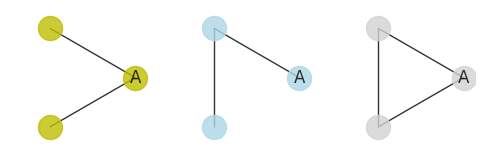

In [19]:
graphlets = find_all_graphlets(['A', 'B', 'C'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(graphlets, labels)

Observe how the set of graphlets now contains three graphs: one that is fully connected, one with vertex `A` on between the other two vertices, and one with vertex `A` as an end point.

The key function call was

`if not any(rooted_is_isomorphic(G, H, root))`

which is a function defined above, but repeated here so we can talk about it.

In [20]:
import networkx.algorithms.isomorphism as iso
def rooted_is_isomorphic(G1, G2, root):
    GM = iso.GraphMatcher(G1, G2)
    if GM.is_isomorphic():
        for mapping in GM.isomorphisms_iter():
            if mapping[root] == root:
                return True
    return False

The workhorse of this code is the function `GM = iso.GraphMatcher(G1, G2, root)`. This function, which will run really slowly for graphs with a lot of vertices, creates an object of type `GraphMatcher`. Calling the class member function `GM.is_isomorphic()` returns true of the two graphs are isomorphic. So that's good.

`GraphMatcher` does a lot more than just determine whether two graphs are isomorphic. It is also capable of finding every isomorphism mapping between the two graphs. We'll need to return to the definition of a isomorphism to understand what it means to "find every isomorphism mapping". 

Godsil and Royle's definition of isomorphic graphs says that graphs $G_1$ and $G_2$ are isomorphic if the following two conditions hold:

- There exists a bijection $\phi: V(G_1) \rightarrow V(G_2)$
- If two vertices $v_1$ and $v_2$ are connected in graph $G_1$ then the vertices in $G_2$ are also connected.

This latter condition can be written as 

$$ \big(v_1,v_2\big) \in E(G_1) \leftrightarrow \big( \phi(v_1),\phi(v_2)\big ) \in E(G_2) $$

The phrase "fine every isomorphism mapping" means that the `GraphMatcher.isomorphisms_iter()` finds a mapping $phi$ that satisfies the two conditions, then finds a different mapping, and so on. 

What we are going to look for is an isomorphism mapping $\phi$ that has the special property that the root vertex is in the same location, relative to the edges in the graph, in both graphs. This means that $\phi({\rm root}) = {\rm root}$. The line `if mapping[root] == root` implements this check for us. 

And here's the key observation: if there is an isomorphism mapping $\phi$ that satisfies $\phi({\rm root}) = {\rm root}$ then that tells us that the two graphs are _isomorphic_ and that the _root vertex is in the same location in both graphs_. If not such mapping can be found, the two graphs, though possible isomorphic, do not satisfy the property that one can be mapped to the other without moving the root vertex. 

---

Let's build intuition by looking at the set of unrooted graphlets again and comparing them to the set of rooted graphlets.

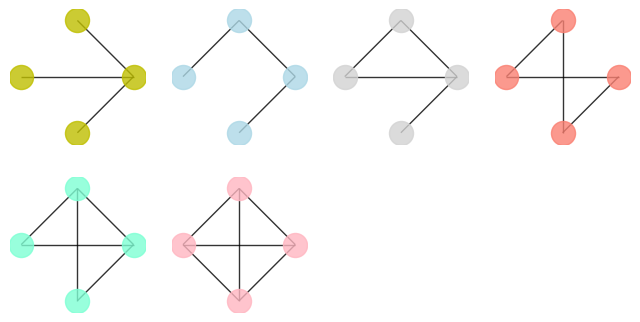

In [21]:
### Unrooted 
four_node_graphlets = find_all_unrooted_graphlets(['A', 'B', 'C', 'D'])
show_graphs_in_a_set(four_node_graphlets, num_cols=4)

And now rooted

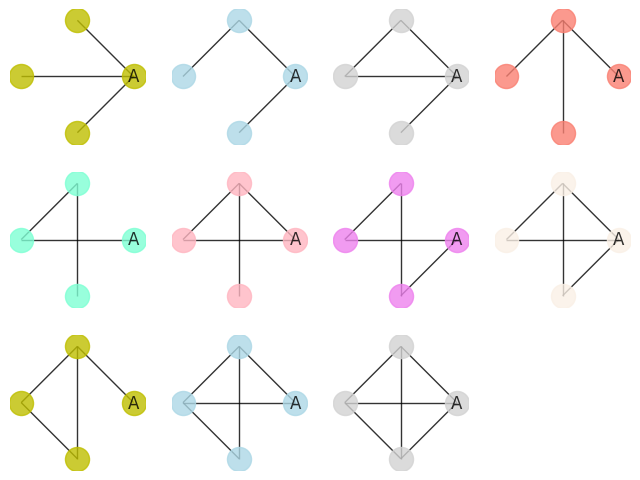

In [22]:
four_node_graphlets = find_all_graphlets(['A', 'B', 'C', 'D'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(four_node_graphlets, labels)

Look at how many more graphlets there are. And that is why people use rooted graphs to create their graphlets, because rooted graphlets offer more ways to talk about what the graph around a specific vertex looks like! 


---

#### Graphlets are Induced Subgraphs

We've figured out three of the four requirements of a graphlet.

**Elements of a group of graphlets:**
  - non-isomorphic graphs
  - connected graphs
  - rooted graphs
  - induced subgraphs

  We can now talk about _induced subgraphs_. Let's return to the set of all three vertex subgraphs found in our example graph. Here's the example graph again:

(-1.2, 1.2)

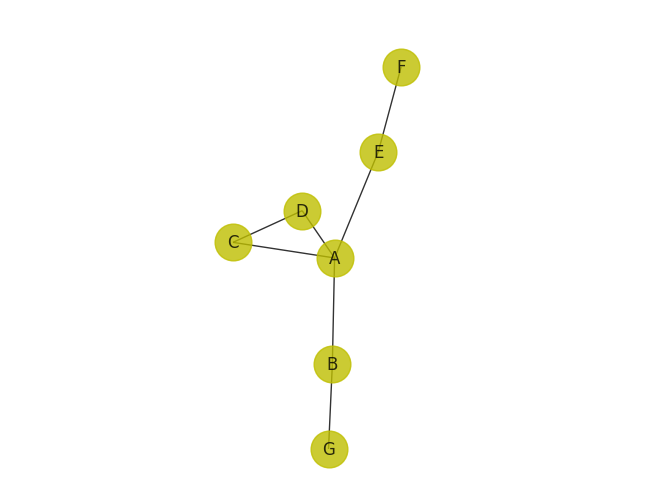

In [23]:
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G,pos,node_color='y', alpha = 0.8, node_size = 700, with_labels = True)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

And here are the sets of all three-node subgraphs containing vertex `A`.

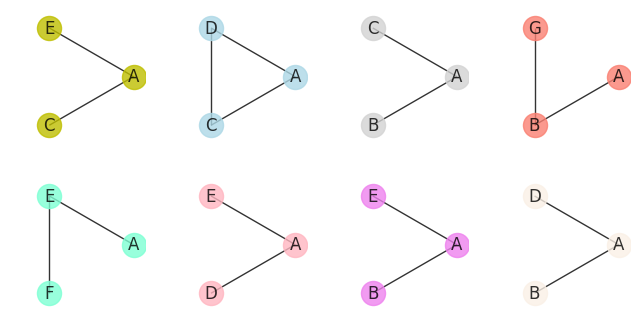

In [24]:
graphs = find_subgraphs_containing_vertex(G, 3, 'A')
labels: dict[str, str] = {vertex: vertex for vertex in G.nodes()}
show_graphs_in_a_set(graphs, labels)

Look at the subgraph containing vertices `A`, `C`, and `D`. Notice how the original graph has these three vertices connected to each other too. But wouldn't it be accurate to say that those three vertices are also part of a subgraphs `A-C-D`, `A-D-C`, and `C-A-D`. Read the dashes in this notation as a representation of an edge between the vertices. Why don't those _triplet_ graphs show up in the set of subgraphs?

Before we give the mathematical reason, which will define what it means to be an _induced subgraph_, let's talk about why we are doing all this work. Recall from class that the _local clustering coefficent_ told us the number of _triads_ that a vertex was in divided by the number of _triplets_ that the vertex was in. Here's a screen shot from a class slide.

<img src = "./figures/triples_and_triads.png" alt="triples and triads from class slides"/>

Knowing that a graph is part of a triad tells us a lot about what is happening around the graph, so when we should say that a vertex is part of a triad and not just just part of a triplet involving the same vertices.

That's why the triad containing vertices `A`, `C`, and `D` is part of the important three-vertex subgraphs containing vertex `A`, and none of the triplet subgraps `A-C-D`, `A-D-C`, and `C-A-D` are.

---

**Mathematical Definition of an Induced Subgraph**

An induced subgraph is a special type of subgraph. Consider graph $G_2$ and another graph $G_1$. Recall that graph $G_1$ is a subgraph of $G_2$ if

  - $V(G_1) \subseteq V(G_2)$, and
  - $E(G_1) \subseteq E(G_2)$

Essentially, a subgraph is made up of the parts (vertices and edges) of another graph.

An _induced subgraph adds a third condition

  - $\forall u,v \in V(G_1)\ \  (u,v) \in E(G_2) \Rightarrow (u,v) \in E(G_1)$

In words, if the subgraph $G_1$ has two nodes that were connected in $G_2$ then $G_1$ is an _induced subgraph of $G_2$_ only if the two nodes are also connected in $G_1$. 

In the original graph, a subgraph made up of nodes $A$, $C$, and $D$ is an induced subgraph only if it contains the edges $\{A,C\}$, $\{C,D\}$, and $\{A,D\}$. Thus, the induced subgraph containing these three nodes is a triad. Relying on induced subgraphs automatically tells us when a node is part of a triad and not just a triplet.


And here's where we were lucky. The code for finding all the three-node subgraphs used the following line: `subgraph: nx.Graph = G.subgraph(nodes)`. It's easy to miss, but the networkx function `G.subgraph` returns the _induced subgraph_ of graph `G` that contains the nodes in the list. We got the induced subgraphs without even trying!

---
---


### Using Graphlets

The purpose of this (very long) discussion is because graphlets tell us about the local graph structures that surround a node in a given graph. What we'll do is choose a node and count how many of the possible graphlets the subgraphs containing that node belongs too.

We can illustrate with an example. It's helpful to have a drawing routine that show the graph in a bright color that is different from the colors of our graphlets.

In [25]:
def show_graph(G: nx.Graph, title:str) -> None:
    _ = plt.figure(figsize = (2,2))
    pos = nx.circular_layout(G)
    nx.draw(G, 
                pos, 
                node_color='cyan', 
                alpha = 0.8, node_size = 300, with_labels = True)
    ax = plt.gca()
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_title(title)

We'll use the same example graph

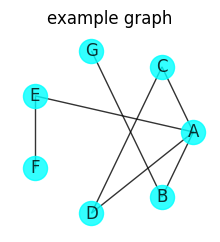

In [26]:
show_graph(G, title = 'example graph')

Let's find all graphlets that contain two nodes or three nodes.

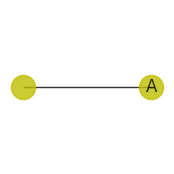

In [27]:
two_node_graphlets = find_all_graphlets(['A', 'B'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(two_node_graphlets, labels)

And repeat for three node graphlets

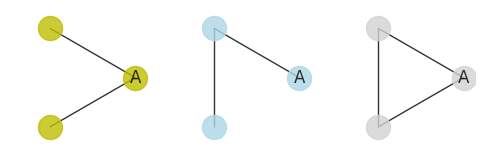

In [28]:
three_node_graphlets = find_all_graphlets(['A', 'B', 'C'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(three_node_graphlets, labels)

And repeate for four node graphlets

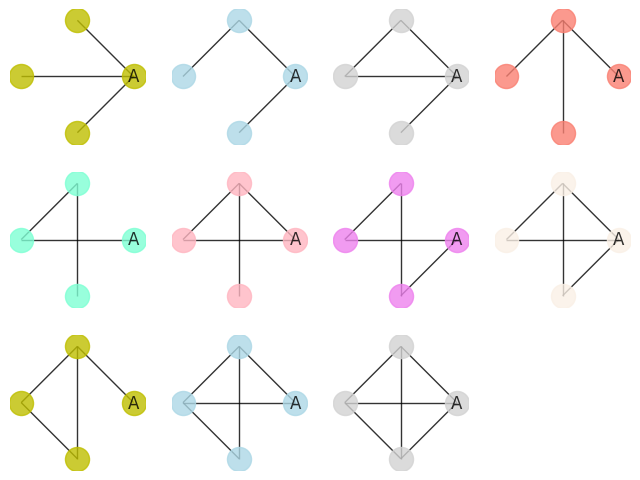

In [29]:
four_node_graphlets = find_all_graphlets(['A', 'B', 'C', 'D'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(four_node_graphlets, labels)

We'll now find all subgraphs of our example graphs that have two nodes and that contain vertex `A`. And we'll repeat for three node subgraphs and four node subgraphs.

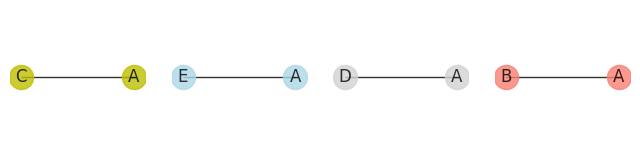

In [30]:
two_node_subgraphs = find_subgraphs_containing_vertex(G, 2, 'A')
three_node_subgraphs = find_subgraphs_containing_vertex(G, 3, 'A')
four_node_subgraphs = find_subgraphs_containing_vertex(G, 4, 'A')
labels = {node: node for node in G.nodes()}
show_graphs_in_a_set(two_node_subgraphs, labels)

Each of these subgraphs are isomorphic to the two-node graphlets, so we say that node `A` is part of four subgraphs that are isomorphic to the one two-node graphlet. In code, we can visualize this by iterating through each graphlet type and show how many of the different subgraphs of the example graph are isomorphic to the graphlet type. For the two-node graph, this is easy.

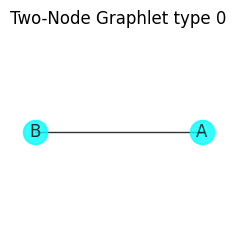

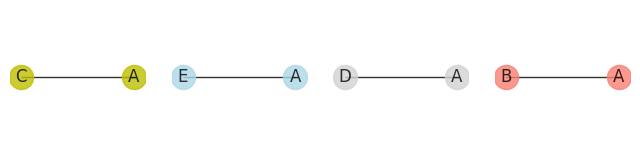

In [31]:
count: int = 0
graphlet_type_count_dict: dict[int, int] = dict()
root = 'A'
for graphlet in two_node_graphlets:
    show_graph(graphlet, f"Two-Node Graphlet type {count}")
    graphs_of_graphlet_type = []
    for H in two_node_subgraphs:
        if rooted_is_isomorphic(H, graphlet, root):
            graphs_of_graphlet_type.append(H)
    graphlet_type_count_dict[count] = len(graphs_of_graphlet_type)
    count += 1
    if len(graphs_of_graphlet_type) > 0:
        show_graphs_in_a_set(graphs_of_graphlet_type, labels)

It gets more interesting when we look at three node graphlets. We'll continue by indexing each three node graphlet using the same counter.

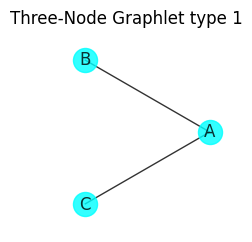

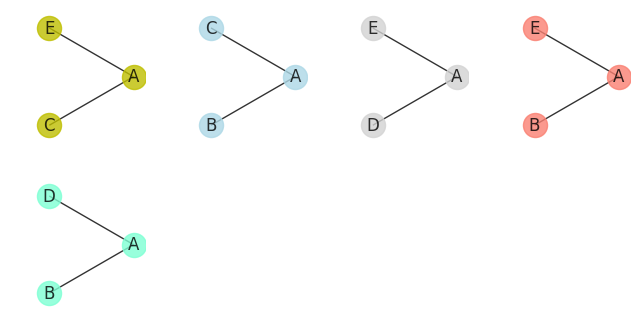

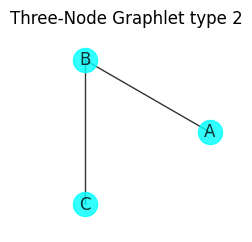

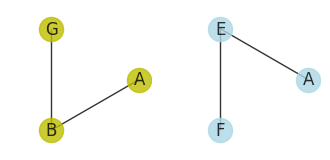

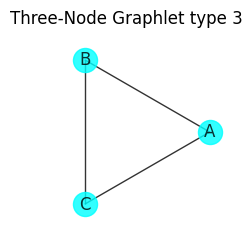

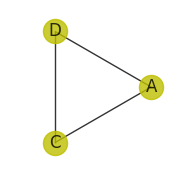

In [32]:
root = 'A'
for graphlet in three_node_graphlets:
    show_graph(graphlet, f"Three-Node Graphlet type {count}")
    graphs_of_graphlet_type = []
    for H in three_node_subgraphs:
        if rooted_is_isomorphic(H, graphlet, root):
            graphs_of_graphlet_type.append(H)
    graphlet_type_count_dict[count] = len(graphs_of_graphlet_type)
    count += 1
    if len(graphs_of_graphlet_type) > 0:
        show_graphs_in_a_set(graphs_of_graphlet_type, labels)

So vertex `A` has a count of 4 type 0 graphlets, 5 type 1 graphlets, two type 2 graphlets, and one type 3 graphlet. 

Continuing with four node graphlets.

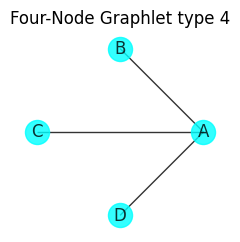

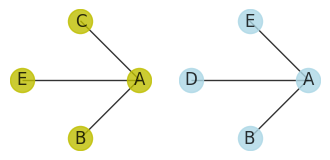

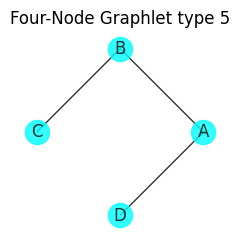

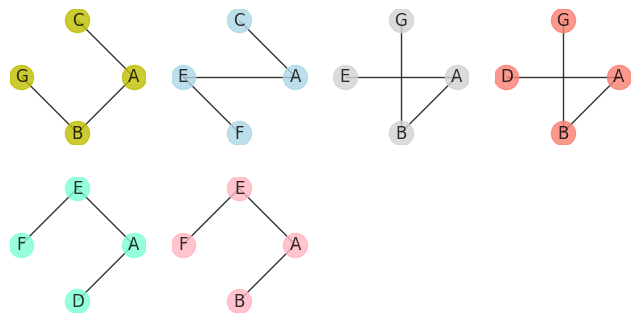

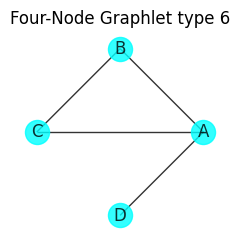

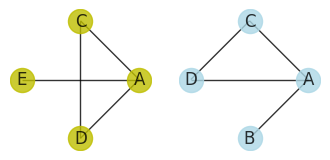

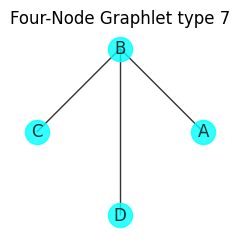

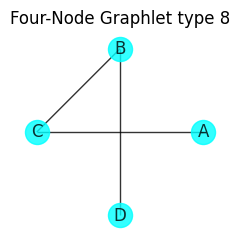

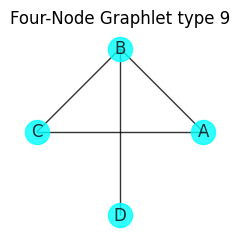

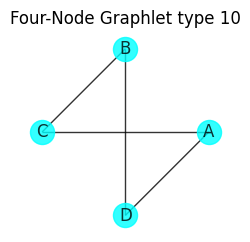

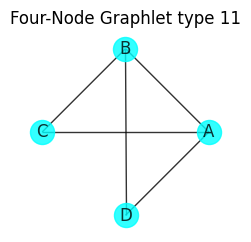

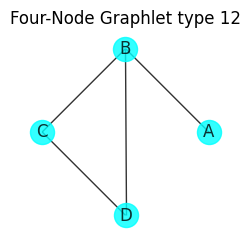

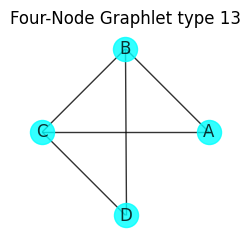

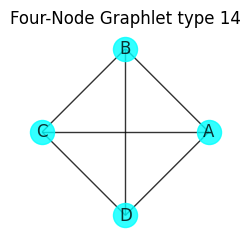

In [33]:
root = 'A'
for graphlet in four_node_graphlets:
    show_graph(graphlet, f"Four-Node Graphlet type {count}")
    graphs_of_graphlet_type = []
    for H in four_node_subgraphs:
        if rooted_is_isomorphic(H, graphlet, root):
            graphs_of_graphlet_type.append(H)
    graphlet_type_count_dict[count] = len(graphs_of_graphlet_type)
    count += 1
    if len(graphs_of_graphlet_type) > 0:
        show_graphs_in_a_set(graphs_of_graphlet_type, labels)

In [34]:
print(list(graphlet_type_count_dict.values()))

[4, 5, 2, 1, 2, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0]


If we list the number of each graphlet type for vertex `A` in a list, we get the _graphlet count vector_, given by:

$v_{\rm graphlet} = [4, 5, 2, 1, 2, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0]$

This graphlet vector is a view into the local graph structures surrounding vertex `A`. 

The homework problem will have you find the graphlet vector for a few different vertices in a few different graphs.